# Комп'ютерне моделювання задач прикладної математики

## Основи класичної молекулярної динаміки. 

###  Лабораторна робота 2

***Студентка Пороскун Олена. Група ПМ.м-21***

*Task 3*

In [1]:
from matplotlib import pyplot as plt

In [2]:
import random
import numpy as np
import math
import time

In [3]:
count = 50 # кількість частинок

Розраховуємо випадкову величину.

In [4]:
def randV():
    #random.seed(s)
    max_num = 2147483647
    ksi = random.randint(0, max_num) / (max_num+1) # ksi = rand_r(&seedp)/(RAND_MAX+1.0);
    return ksi
#randV()

Розраховуємо початкові значення координат $(x_0,y_0)$ та швидкостей частинок $(vx_{0},vy_{0})$, що знаходяться у резервуарі розміром $(Lx,Ly)$.

In [5]:
def Inital_XY(N=10, Lx = 20, Ly = 20, vmax = 20):
    x0,  y0   = np.zeros(N), np.zeros(N)
    vx0, vy0  = np.zeros(N), np.zeros(N)
    for i in range(N):
        x0[i] = randV()*Lx;
        y0[i] = randV()*Ly;
        vx0[i] = vmax*(2*randV() - 1);
        vy0[i] = vmax*(2*randV() - 1);
    return x0, y0, vx0, vy0
#x0_, y0_, vx0_, vy0_ = Inital_XY()

In [6]:
x0, y0, vx0, vy0 = Inital_XY(N=count)

Перевіряємо межі початкових значень,

In [7]:
print(min(x0),min(y0))
print(max(vx0), max(vy0))

0.8172706048935652 0.47896682284772396
19.723131861537695 19.90949798375368


Перевіряємо розмірність масивів.

In [8]:
print(np.shape(x0),np.shape(y0), np.shape(vx0), np.shape(vy0))

(50,) (50,) (50,) (50,)


Виводимо перші 5 значень з кожного масиву.

In [9]:
list(zip(x0[:5], y0[:5]))

[(5.344565445557237, 11.358099896460772),
 (1.207144232466817, 2.4572083726525307),
 (19.869896341115236, 14.526140419766307),
 (17.00371972285211, 4.76365159265697),
 (15.880661383271217, 8.696228200569749)]

In [10]:
list(zip(vx0[:5], vy0[:5])) 

[(8.21661189198494, -16.45287286490202),
 (-14.350154343992472, 5.645126365125179),
 (-12.086515128612518, -11.710753459483385),
 (-0.6559620052576065, -1.2511676736176014),
 (-1.293065994977951, -3.0179922468960285)]

Будуємо графік координат декількох перших частинок (за замовчуванням їх буде 10 або всі). 

In [11]:
def fun_plot1(x, y, n=10):
    
    if (n < 2):
        n = 1   
    if (n > len(x)):
        n = len(x)   
    
    # 1 спосіб
    for i in range(n):
        plt.scatter(x[i], y[i], s=30, label=f'{i+1}' " частинка")
        plt.text(x[i], y[i], "  "f'{i+1}')
        
    # 2 спосіб
    #plt.scatter(x[:n], y[:n], s=20, c='m') 

    plt.xlabel("x") 
    plt.ylabel("y")
    plt.title("Графік координат перших " f'{n}' " частинок" )
    if (n < 20):
        plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    ax = [0, 20, 0, 20]
    ax2=[-1, 21, -1, 21]
    ax3=[-1, 32, -1, 21]
    plt.axis(ax2)
    
#fun_plot1(x0, y0) 

Розглянемо основнi iдеї методу молекулярної динамiки. Припустимо, що мiж N(N − 1)/2 парами частинок дiє двочастинковий потенцiал.  
$ \\ $   Як придатний приклад такого потенцiалу можна розглянути потенцiал Леннарда-Джонса 
$$ U(r_{12}) =  4\varepsilon \{ (\frac{\sigma}{r_{12}})^{12} - ( \frac{\sigma}{r_{12}})^6 \}$$
де $r_{12}$ — вiдстань мiж частинками 1 i 2,
$ \\ $ a $\varepsilon$ ("вiдстань" взаємодiї частинок 1 та 2) i σ (глибина потенцiальної ями або "енергiя") — сталi.

In [12]:
# (двочастинковий) потенцiал Леннарда-Джонса, що діє між N(N − 1)/2 парами частинками
def phi(r, sigma=1, eps=1):
    sr6 = (sigma/r)**6
    U_r = 4*eps*(sr6*sr6 - sr6)
    return U_r

Такий потенцiал добре описує притягання у випадку, коли частинки вiддаленi на значну вiдстань, i вiдштовхування, коли вони зближенi. У такому разi еволюцiя системи у часi вiдбувається вiдповiдно до детермiнiстичних законiв руху кожної частинки, причому сила взаємодiї $F_{ij}$ спрощується i подається так: 

$$ \overrightarrow{F}(|\overrightarrow{x_i}-\overrightarrow{x_j}|) = - \frac{\partial}{\partial \overrightarrow{x_i}}U(|\overrightarrow{x_i}-\overrightarrow{x_j}|) $$

In [13]:
# сила взаємодiї між частинкамии 
def F(r, sigma=1, eps=1):
    sr6 = (sigma/r)**6
    F_r = 24*eps*sigma/r*sr6*(2*sr6 - 1)
    return F_r

*Граничні умови (коли частинка виходить за межі резервуара)*

In [14]:
# жорсткі граничні умови
def Test11(X, Y, Vx, Vy, Lx=20, Ly=20):
    k=0
    while ((X < 0) | (X > Lx) | (Y < 0) | (Y > Ly)):
        if (X < 0):
            X = -X
            Vx = -Vx

        if (X > Lx):
            X = Lx-(X-Lx)
            Vx = -Vx

        if (Y < 0):
            Y = -Y
            Vy = -Vy 

        if (Y > Ly):
            Y = Ly-(Y-Ly)
            Vy = -Vy
        k+=1
    
    return X, Y, Vx, Vy, k

#X_, Y_, Vx_, Vy_, k_ = Test11(X=-4, Y=250, Vx=9, Vy=8, Lx=20, Ly=20) 
#print(X_, Y_, Vx_, Vy_) #4 10 -9 8

Використовуємо алгоритм Ейлера щоб розрахоувати координати $(x,y)$ частинок з часом та з цими даними розрахувати значення середнього часу $mpt(R)$ досягнення значення $R$(відстані, що пройшла частинка). 

$$ R_i = \sqrt{(x_i - x_{i0})^2 + (y_i - y_{i0})^2} $$

### $$ Алгоритм \ Ейлера $$

$$ a_{xi} = \frac{F(x_i, y_i)}{m_i}=-\frac{1}{m_i}\frac{\partial}{\partial{x_i}} U(x_i, y_i) $$
$$ a_{yi} = \frac{F(x_i, y_i)}{m_i}=-\frac{1}{m_i}\frac{\partial}{\partial{y_i}} U(x_i, y_i) $$

$$ x_i(t+\Delta t) = x_i(t) + v_{xi}(t)\Delta t $$ 
$$ y_i(t+\Delta t) = y_i(t) + v_{yi}(t)\Delta t $$

$$ v_{xi}(t+\Delta t) = v_{xi}(t) + a_{xi}(t)\Delta t $$ 
$$ v_{yi}(t+\Delta t) = v_{yi}(t) + a_{yi}(t)\Delta t $$

$$ a = \frac{dv}{dt} = \frac{d^2x}{dt^2} $$
$$ \frac{dx}{dt} = v $$
$$ \frac{dv}{dt} = a $$

In [15]:
def funct3(x0, y0, vx0, vy0, R=3, mas=1, sigm=1, epsilon=1, Lx=20, Ly=20, test_ = "Test11"):
    
    N = len(x0) # к-сть частинок
    
    t = 0       # початковий час
    dt = 0.0002 # крок по часу
    
    # тимчасовий масив координат та швидкостей
    x_n, y_n = np.zeros(N), np.zeros(N)
    vx_n, vy_n = np.zeros(N), np.zeros(N)
    
    times_R = np.zeros(N) # час для кожної частинки коли вона досягла R
    R_i = np.zeros(N)     # саме значення R_i(>=R), яке досягла кордината
    
    # mean pasage time (середній час досягнення значення R)
    mpt = 0
    
    for i in range(N):
        t = 0
        x, y = x0, y0
        vx, vy = vx0, vy0
        
        while (R_i[i] < R):
            
            t = round(t,5)

            X, Y = x[i], y[i]
            Vx, Vy = vx[i], vy[i]

            X1 = X + Vx*dt
            Y1 = Y + Vy*dt

            fx, fy = 0, 0 
            for j in range(N):
                if (j!=i):
                    rx = X1 - x[j]
                    ry = Y1 - y[j]
                    r = math.sqrt(rx*rx + ry*ry)      
                    if (r < math.sqrt(Lx*Lx + Ly*Ly)):
                        Fr = F(r, sigma = sigm, eps = epsilon)
                        Fr = Fr/mas
                        fx += (Fr * rx / r)
                        fy += (Fr * ry / r)

            Vx1 = Vx + fx*dt
            Vy1 = Vy + fy*dt

            if (test_ == "Test11"):
                X1, Y1, Vx1, Vy1, steps = Test11(X1, Y1, Vx1, Vy1)

            x_n[i], y_n[i] = X1, Y1
            vx_n[i], vy_n[i] = Vx1, Vy1    
            
            dx = X1 - x0[i]
            dy = Y1 - y0[i]
            R_i[i] += math.sqrt(dx*dx + dy*dy)
            
            if (R_i[i] >= R):
                times_R[i] = t

            x, y = x_n, y_n
            vx, vy = vx_n, vy_n
            
            t += dt        
    
    mpt = np.mean(times_R)
    mpt = round(mpt,5)
    
    #print("R","\teps"," \tsigma", "\tmpt ")
    print(R,"\t",epsilon,"\t",sigm,"\t", mpt)
    
    return times_R, R_i, mpt

Знайдемо середній час досягнення частинками $ R = 3 $.

* Розрахуємо дані для $ R = 3, \ \sigma \ (sigma1) = [1, 3, 5, 7], \ \varepsilon \ (epsilon) = 1.$

In [16]:
start_time = time.time()
sigma1 = [0.1, 0.4, 1, 1.5]
#sigma1 = [1, 1.5, 2, 2.5]
times1 = []   #
Ri1    = []   #
mpt1   = []   # mean pasage time (середній час досягнення значення R)
print("R","\t eps "," \t sigma", "\t mpt1")
for i in range(len(sigma1)):
    times_, Ri_, mpt_ = funct3(x0, y0, vx0, vy0, sigm = sigma1[i], epsilon = 1)
    times1.append(times_)
    Ri1.append(Ri_)
    mpt1.append(mpt_)
print("Ця частина коду виконувалася %s seconds." % round(time.time() - start_time, 2)) 

R 	 eps   	 sigma 	 mpt1
3 	 1 	 0.1 	 0.01048
3 	 1 	 0.4 	 0.01048
3 	 1 	 1 	 0.00984
3 	 1 	 1.5 	 0.00742
Ця частина коду виконувалася 1.86 seconds.


Перевіримо розмірність нових масивів.

In [17]:
print(np.shape(times1))
print(np.shape(Ri1))
print(np.shape(mpt1))

(4, 50)
(4, 50)
(4,)


* Розрахуємо дані для $ R = 3, \sigma \ (sigma) = 1, \varepsilon \ (epsilon2) = [0.5, 1, 1.5, 2].$

In [18]:
start_time = time.time()
epsilon2 = [1, 3, 5, 10]
times2 = []   #
Ri2    = []   #
mpt2   = []   # mean pasage time (середній час досягнення значення R)
print("R","\t eps"," \t sigma", "\t mpt2")
for i in range(len(epsilon2)):
    times_, Ri_, mpt_ = funct3(x0, y0, vx0, vy0, sigm = 1, epsilon = epsilon2[i])
    times2.append(times_)
    Ri2.append(Ri_)
    mpt2.append(mpt_)
print("Ця частина коду виконувалася %s seconds." % round(time.time() - start_time, 2)) 

R 	 eps  	 sigma 	 mpt2
3 	 1 	 1 	 0.00984
3 	 3 	 1 	 0.00922
3 	 5 	 1 	 0.00903
3 	 10 	 1 	 0.00878
Ця частина коду виконувалася 1.03 seconds.


In [19]:
print(np.shape(times2))
print(np.shape(Ri2))
print(np.shape(mpt2))

(4, 50)
(4, 50)
(4,)


Функція, що априксимує дані, повертає: 
* coef - коефіцієнти рівняння, яке відповідає початковим даним, 
* polinom - рівняння з коефіцієнтами, 
* mpt_to_compare - значення функції для порівняння зі початковими.

In [20]:
def fun_aprox(X, mpt):
    k=1
    mpt_new = mpt*0
    eps = 1000
    bool_mpt = 0

    while ((eps >= 0.00001) & (k<10)):
        coef = np.polyfit(X, mpt,k)
        polinom = np.poly1d(coef)
        mpt_to_compare = polinom(X)
        
        mpt_old = np.round(mpt,5)
        mpt_to_compare = np.round(mpt_to_compare,5)

        eps = abs(mpt_old[0] - mpt_to_compare[0])
        bool_mpt = np.sum(mpt_old == mpt_to_compare)

        #print("\n k =",k)
        #print("coef:", coef)
        #print("y = aprox(x):\n",polinom)
        #print("Перевiрка:\n", " X =", X, "\n mpt = ", mpt_old,"\n mpt_to_compare =", mpt_to_compare)
        #print("bool_mpt =",bool_mpt)
        #print("eps =",eps)

        k += 1

    print("coef:", coef)
    print("y = aprox(x) :\n",polinom)
    print("Перевiрка:\n", " X =", X, "\n", mpt_old, "= mpt\n",mpt_to_compare,"= mpt_to_compare")
    
    return coef, polinom, mpt_to_compare

#c0, p0, mpt_to_compare0 = fun_aprox(sigma, mpt)

Побудуємо тепер початкові дані та знайдену криву.

coef: [-0.00160366  0.0012203  -0.00027338  0.01049674]
y = aprox(x) :
            3           2
-0.001604 x + 0.00122 x - 0.0002734 x + 0.0105
Перевiрка:
  X = [0.1, 0.4, 1, 1.5] 
 [0.01048 0.01048 0.00984 0.00742] = mpt
 [0.01048 0.01048 0.00984 0.00742] = mpt_to_compare


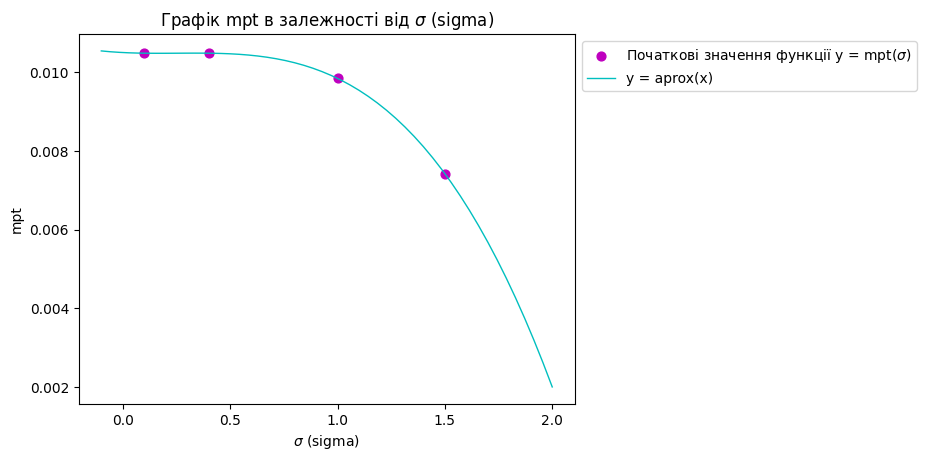

In [21]:
def fun_plot31(mpt, sigm = [0.1, 0.4, 1, 1.5]):
    
    plt.scatter(sigm, mpt, label="Початковi значення функції y = mpt($\sigma$)", s=40, c='m')
    
    # порівняння з апроксимованою кривою деякого степеня
    #sigm_new = np.linspace(0.5, 8.5, 50)
    
    min_sigm = min(sigm)
    max_sigm  = max(sigm)
    sigm_new = np.linspace(min_sigm-0.2, max_sigm+0.5, 50)
    
    coef, polinom, mpt_to_compare = fun_aprox(sigm, mpt)
    mpt_new = polinom(sigm_new)
    plt.plot(sigm_new, mpt_new, label = "y = aprox(x)", linewidth = 1, c='c')
    
    plt.xlabel("$\sigma$ (sigma)")
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від $\sigma$ (sigma)")
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

fun_plot31(mpt1, sigma1)

coef: [-5.25793651e-06  1.01071429e-04 -6.45932540e-04  1.03901190e-02]
y = aprox(x) :
             3             2
-5.258e-06 x + 0.0001011 x - 0.0006459 x + 0.01039
Перевiрка:
  X = [1, 3, 5, 10] 
 [0.00984 0.00922 0.00903 0.00878] = mpt
 [0.00984 0.00922 0.00903 0.00878] = mpt_to_compare


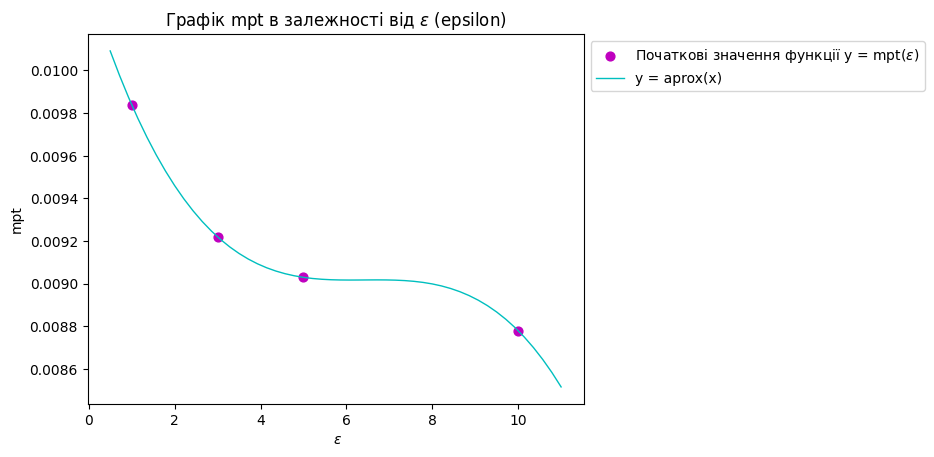

In [22]:
def fun_plot32(mpt, epsilon = [1, 3, 5, 10]):
    
    plt.scatter(epsilon, mpt, label="Початковi значення функції y = mpt($\epsilon$)", s=40, c='m')
    
    # порівняння з апроксимованою кривою деякого степеня
    min_eps = min(epsilon)
    max_eps = max(epsilon)
    epsilon_new = np.linspace(min_eps-0.5, max_eps+1, 50)
    coef, polinom, mpt_to_compare = fun_aprox(epsilon, mpt)
    mpt_new = polinom(epsilon_new)
    plt.plot(epsilon_new, mpt_new, label = "y = aprox(x)", linewidth = 1, c='c')
    
    plt.xlabel(" $ \epsilon $")
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від $ \epsilon $ (epsilon)")
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

fun_plot32(mpt2, epsilon2)

### ---------------------------------------------------------------------------------------------